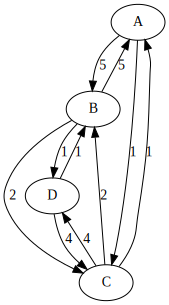

In [1]:
from graphviz import Source

g = '''
digraph {
  A -> B [label=5];
  A -> C [label=1];
  B -> A [label=5];
  B -> C [label=2];
  B -> D [label=1];
  C -> A [label=1];
  C -> B [label=2];
  C -> D [label=4];
  D -> B [label=1];
  D -> C [label=4];
}
'''

Source(g)

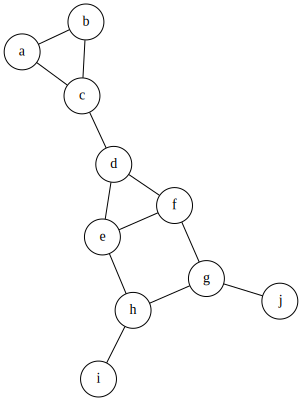

In [14]:
my_tree = '''
graph tree { 
  layout=neato
  node [shape=circle]
  a--b--c--d--f;
  d--e;
  e--f--g;
  g--h;
  h--i;
  a--c;
  e--h;
  g--j;
}'''
from graphviz import Source
Source(my_tree)

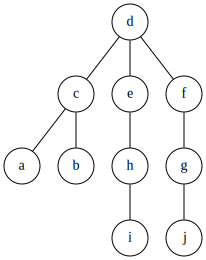

In [18]:
my_tree = '''
graph tree { 
  layout=dot
  node [shape=circle]
  d--c;
  d--e;
  d--f;
  c--a;
  c--b;
  e--h;
  f--g;
  h--i;
  g--j;
}'''
from graphviz import Source
Source(my_tree)

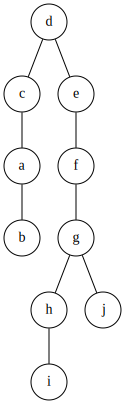

In [19]:
my_tree = '''
graph tree { 
  layout=dot
  node [shape=circle]
  d--c--a--b;
  d--e--f--g--h--i;
  g--j;
}'''
from graphviz import Source
Source(my_tree)

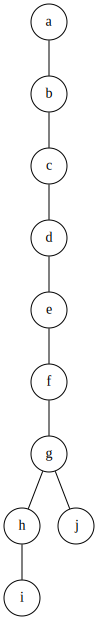

In [20]:
my_tree = '''
graph tree { 
  layout=dot
  node [shape=circle]
  a--b--c--d--e--f--g--h--i;
  g--j;
}'''
from graphviz import Source
Source(my_tree)

In [2]:
def dijkstra(graph, start, end):
    # Create a dictionary to store the distances from the start node to all other nodes
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Create a set to store the unvisited nodes
    unvisited = set(graph)

    # Create a dictionary to store the previous node for each node
    previous = {node: None for node in graph}

    # Create the current node
    current = start

    while current != end:
        # Update the distances of the neighbors of the current node
        for neighbor in graph[current]:
            distance = distances[current] + graph[current][neighbor]
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current

        # Mark the current node as visited
        unvisited.remove(current)

        # Find the node with the smallest distance that has not been visited
        candidates = {node: distances[node] for node in unvisited}
        current = min(candidates, key=candidates.get)

    # Build the path from the start node to the end node
    path = []
    while current != start:
        path.insert(0, current)
        current = previous[current]
    path.insert(0, start)

    return path


In [3]:
graph = {
    'A': {'B': 5, 'C': 1},
    'B': {'A': 5, 'C': 2, 'D': 1},
    'C': {'A': 1, 'B': 2, 'D': 4},
    'D': {'B': 1, 'C': 4}
}

start = 'A'
end = 'D'

path = dijkstra(graph, start, end)

print(path)

['A', 'C', 'B', 'D']
